In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mosaic24-ps1/sample_submission.csv
/kaggle/input/mosaic24-ps1/train.csv
/kaggle/input/mosaic24-ps1/test.csv


In [2]:
!pip install pandas
!pip install pmdarima
!pip install neptune
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 398.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.5/495.5 kB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.0 MB/s eta 0:00:0000:01
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67673 sha256=1d074b7437b750227bd923a7033f1ea934039ba6785b9ce585bf1c8518839df3
  Stored in directory: /root/.cache/pip/wheels/42/35/4a/44ec4c358db21a5d63ed4e40f0f0012a438106f220bce4ccba
Successfully built bravado-core
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.34
    Uninstalling botocore-1.34.34:
      Suc

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv("/kaggle/input/mosaic24-ps1/train.csv")
train.set_index('Date', inplace=True)
train.head(6)

,Id,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,,
2033-03-01,0,159.271109,167.221488,157.380478,161.915062,160.167043,40490589,Company_0
2033-03-01,1,114.571843,114.409664,112.921505,113.066659,87.844722,8592865,Company_1
2033-03-01,2,50.984499,51.262529,50.266272,50.094499,49.329834,25085661,Company_2
2033-03-01,3,98.585428,99.988079,97.867719,98.811966,91.784469,823271,Company_3
2033-03-01,4,8874.646107,8935.704765,8811.247764,8873.173069,8407.389386,609369,Company_4
2033-03-01,5,136.430652,136.256775,135.141236,135.882546,105.356425,2576112,Company_5


In [5]:
df=train[train["Company"]=='Company_0']

In [6]:
df.Close.tail()

Date
2038-02-22    273.183503
2038-02-23    273.416583
2038-02-24    270.560046
2038-02-27    265.683943
2038-02-28    267.048830
Name: Close, dtype: float64

<Axes: xlabel='Date'>

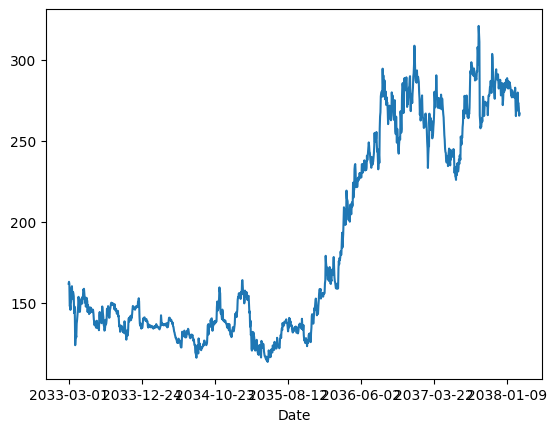

In [7]:
close_data=df.Close
close_data.plot()

In [8]:
!pip install statsmodels

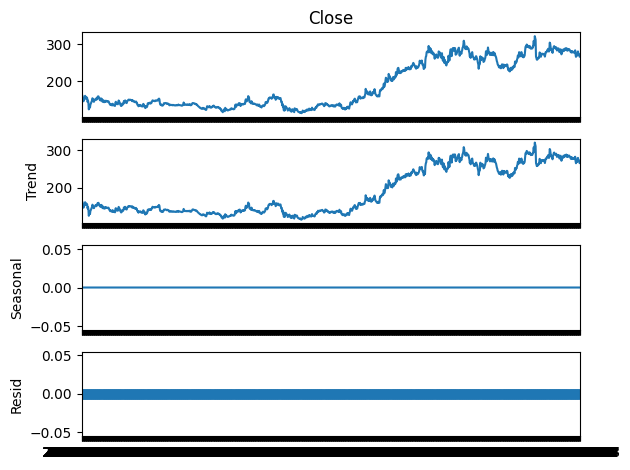

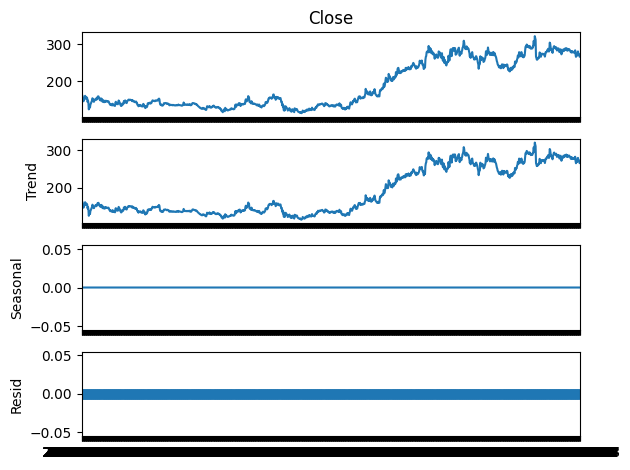

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
result = sd(x=close_data,period=1)
result.plot()

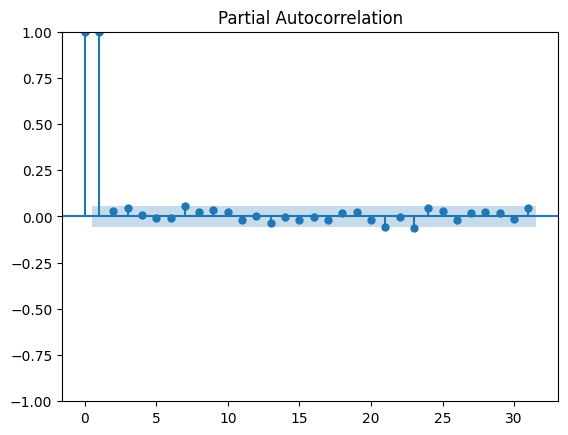

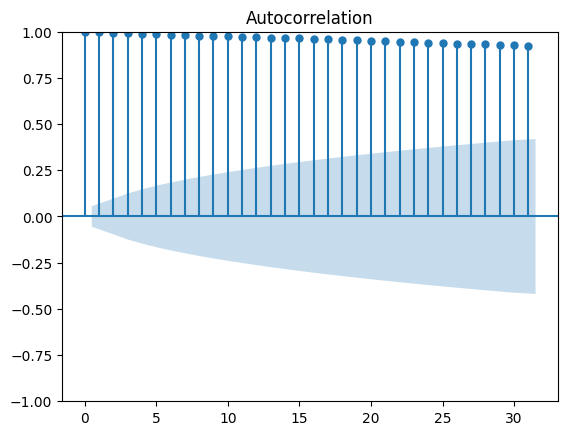

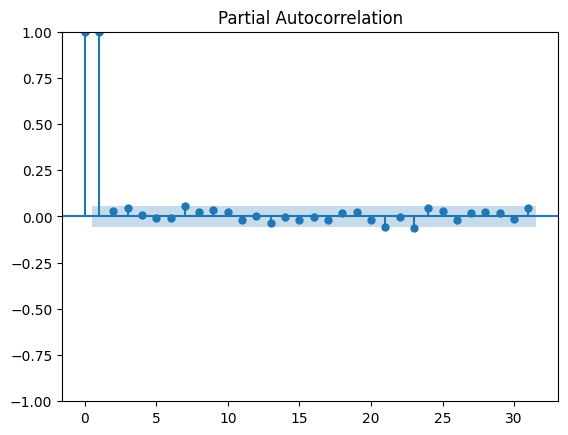

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(close_data)
plot_pacf(close_data)

In [11]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(close_data.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -0.5136691792238234
ADF p-values: 0.8893213321387675
ADF number of lags used: 8
ADF number of observations: 1227
ADF critical values: {'1%': -3.435690695421723, '5%': -2.863898416697677, '10%': -2.5680256555204184}
ADF best information criterion: 6997.469407281275


<Axes: xlabel='Date'>

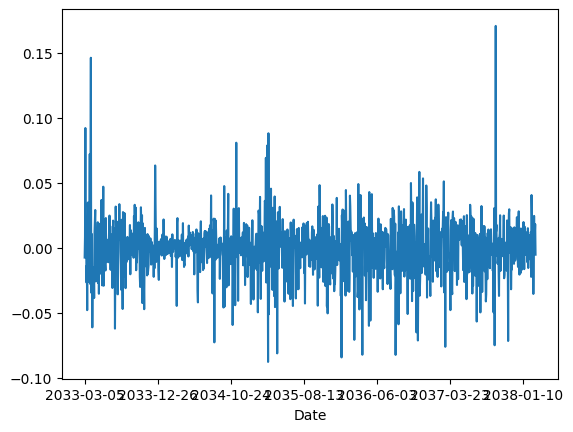

In [12]:
dif=(close_data.shift()-close_data)/close_data
dif=dif.dropna()
dif.plot()

In [13]:
test_data=pd.read_csv("/kaggle/input/mosaic24-ps1/test.csv")
test_data.set_index('Date',inplace=True)
test_data=test_data[test_data["Company"]=='Company_0']

In [14]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(dif.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -14.493420749963654
ADF p-values: 6.0956367187838916e-27
ADF number of lags used: 6
ADF number of observations: 1228
ADF critical values: {'1%': -3.4356863371792095, '5%': -2.8638964938393667, '10%': -2.568024631481501}
ADF best information criterion: -5931.646674542222


In [15]:
from scipy import linalg
print(linalg.lapack.dgetrf([np.nan]))
print(linalg.lapack.dgetrf([np.inf]))

(array([nan]), array([0], dtype=int32), 0)
(array([inf]), array([0], dtype=int32), 0)


In [16]:
close_data.describe()

count    1236.000000
mean      187.377773
std        62.747050
min       113.647274
25%       135.368755
50%       150.766672
75%       257.359367
max       321.068062
Name: Close, dtype: float64

<Axes: xlabel='Date'>

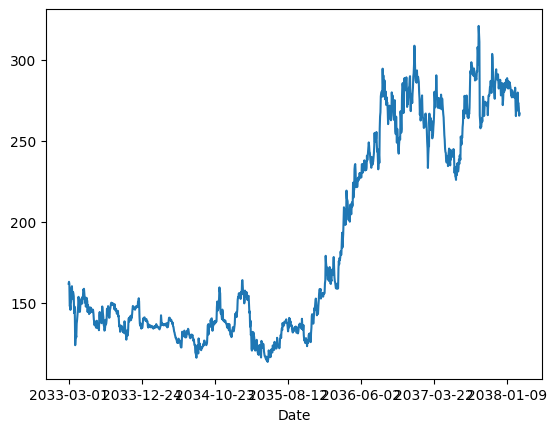

In [17]:
close_data.plot()

In [18]:
test_data.head()

,Id,Company
Date,,
2038-03-01,0,Company_0
2038-03-02,6,Company_0
2038-03-03,12,Company_0
2038-03-06,18,Company_0
2038-03-08,24,Company_0


In [24]:
test_data.index = pd.to_datetime(test_data.index)  # Convert index to datetime
close_data.index=pd.to_datetime(close_data.index)
dif.index=pd.to_datetime(dif.index)
months = [x.month for x in test_data.index]
years = [x.year for x in test_data.index]
day = [x.day for x in test_data.index]

# Convert into one matrix
X = np.array([day, months, years]).T

months = [x.month for x in close_data.index]
years = [x.year for x in close_data.index]
day = [x.day for x in close_data.index]

# Convert into one matrix
y = np.array([day, months, years]).T

months = [x.month for x in dif.index]
years = [x.year for x in dif.index]
day = [x.day for x in dif.index]

# Convert into one matrix
z = np.array([day, months, years]).T

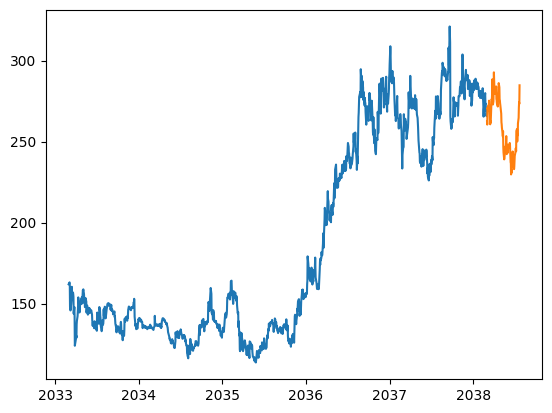

In [23]:
import xgboost as xgb

# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(y, close_data.values)

# predict on the same period
preds = my_xgb.predict(X)

# plot what has been learned
plt.plot(close_data.index, close_data.values)
plt.plot(test_data.index, preds)

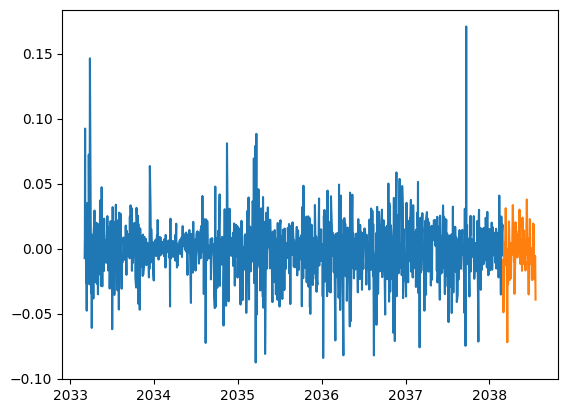

In [25]:
import xgboost as xgb

# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(z, dif.values)

# predict on the same period
preds = my_xgb.predict(X)

# plot what has been learned
plt.plot(dif.index, dif.values)
plt.plot(test_data.index, preds)